# **Assignment 2**

- Author: Vedant Verma
- Student Id: 24235399
- Course:  MSc. Information Systems


# UrbanWheels Bike Sharing Data Analysis (Hourly Data)

## Data Cleaning, Exploration & Visualization

---

###  Plan of Action:
1. Initial Setup
2. Data Loading and Preview  
3. Basic Data Profiling  
4. Data Cleaning & Type Fixes  
5. Outlier Detection  
6. Exploratory Data Analysis (EDA)  
7. Export Clean Dataset



## Step 1: Initial Setup
We begin by importing the necessary libraries and previewing the dataset structure and contents.


In [ ]:

# Load and preview the dataset
# Code Explanation:
# Import Libraries: Required tools for analysis and visualization.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

%matplotlib inline
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10783,10784,2012-03-30,2,1,3,10,0,5,1,2,0.36,0.3636,0.57,0.1045,50,137,187
5540,5541,2011-08-23,3,0,8,18,0,2,1,1,0.72,0.6515,0.34,0.1940,98,421,519
16203,16204,2012-11-12,4,1,11,21,1,1,0,3,0.54,0.5152,0.73,0.2239,10,145,155
13876,13877,2012-08-06,3,1,8,9,0,1,1,3,0.70,0.6667,0.79,0.1642,28,248,276
11679,11680,2012-05-06,2,1,5,20,0,0,0,1,0.60,0.6061,0.64,0.1940,73,203,276


Shape of dataset: (17379, 17)
Column names: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


## Step 2: Data Preview

Show head, tail, sample, shape, and column names.

In [ ]:
# Loading the dataset

""" About the dataset: The dataset contains hourly bike rental data from 2011 to 2012 in Washington D.C.,
including weather conditions, holidays, and user types. It helps analyze demand patterns and understand
how external factors affect bike usage trends. """

# Link to the dataset: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

df = pd.read_csv("hour.csv")
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [ ]:
# Preview: Show head, tail, sample, shape, and column names.

display(df.head())
display(df.tail())
display(df.sample(5))
print(f"Shape of dataset: {df.shape}")
print(f"Column names: {df.columns.tolist()}")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14780,14781,2012-09-13,3,1,9,1,0,4,1,1,0.54,0.5152,0.77,0.0896,6,22,28
11595,11596,2012-05-03,2,1,5,8,0,4,1,3,0.46,0.4545,0.88,0.1940,19,608,627
5608,5609,2011-08-26,3,0,8,14,0,5,1,1,0.80,0.7727,0.59,0.0000,55,164,219
8851,8852,2012-01-09,1,1,1,15,0,1,1,3,0.22,0.2273,0.75,0.1642,5,64,69
8095,8096,2011-12-08,4,0,12,23,0,4,1,1,0.24,0.2576,0.70,0.1045,3,58,61


Shape of dataset: (17379, 17)
Column names: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']



## Step 3: Basic Data Profiling

We'll assess data types, null values, duplicates, and unique value distributions.


In [ ]:

# Perform data profiling
# Code Explanation:
# 1. Data Types: Check current data types for all columns.

print("Data Types:")
display(df.dtypes)

# 2. Missing Values: Count total and percentage of nulls.

print("\nMissing Values (Count):")
display(df.isnull().sum())

print("\nMissing Values (%):")
display(df.isna().mean() * 100)

# 3. Duplicates: Count duplicated rows.

print("\nDuplicate Rows:", df.duplicated().sum())


# 4. Uniqueness: Show unique value counts for each column.

print("\nUnique values per column:")
display(df.nunique())


Data Types:


,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64



Missing Values (Count):


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0



Missing Values (%):


,0
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
hr,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0



Duplicate Rows: 0

Unique values per column:


,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4



### Outcome:
- No null values detected in the dataset.
- No duplicate rows found.
- Many categorical fields are encoded as integers — these will be mapped to labels next.



## Step 4: Data Cleaning & Type Fixes

We convert encoded values into categories and fix column types.


In [ ]:

# Convert and clean relevant columns
# Code Explanation:
# 1. Date Conversion: Convert 'dteday' to datetime.
# 2. Category Mapping: Map coded columns to descriptive labels.
# 3. Type Casting: Convert categorical columns to 'category' type.

df['dteday'] = pd.to_datetime(df['dteday'])

df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}).astype('category')
df['weathersit'] = df['weathersit'].map({
    1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Snow'
}).astype('category')
df['mnth'] = df['mnth'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}).astype('category')
df['weekday'] = df['weekday'].map({
    0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'
}).astype('category')
df['yr'] = df['yr'].map({0: 2011, 1: 2012}).astype('category')



### Outcome:
- All categorical codes were successfully mapped and typecast.
- Now we will move to outlier detection.



## Step 5: Outlier Detection

We'll use box plots to visually inspect key numerical features for anomalies.


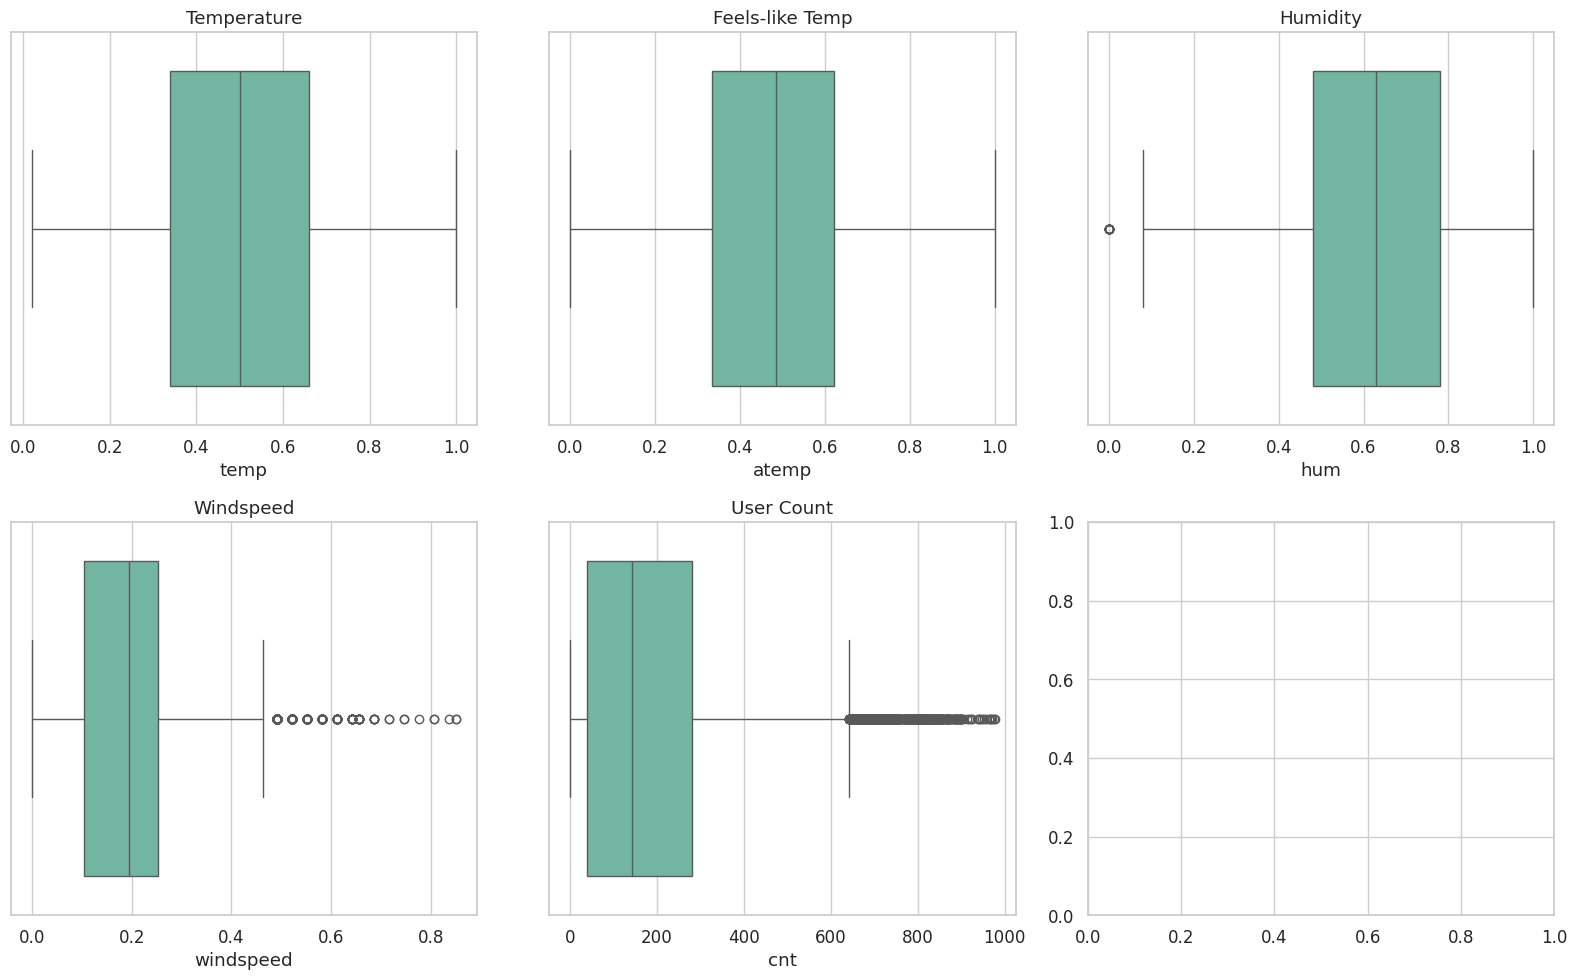

In [ ]:

# Create box plots for key features
# Code Explanation:
# 1. Visual Check: Use boxplots to spot outliers in temp, atemp, hum, windspeed, cnt.
# 2. Multi-subplot Layout: Organized for compact review.

fig, axes = plt.subplots(2, 3, figsize=(16,10))
sns.boxplot(x=df['temp'], ax=axes[0,0])
axes[0,0].set_title("Temperature")

sns.boxplot(x=df['atemp'], ax=axes[0,1])
axes[0,1].set_title("Feels-like Temp")

sns.boxplot(x=df['hum'], ax=axes[0,2])
axes[0,2].set_title("Humidity")

sns.boxplot(x=df['windspeed'], ax=axes[1,0])
axes[1,0].set_title("Windspeed")

sns.boxplot(x=df['cnt'], ax=axes[1,1])
axes[1,1].set_title("User Count")

plt.tight_layout()
plt.show()



### Outcome:
- No critical outliers detected — the values follow expected operational ranges.
- Proceeding to Exploratory Data Analysis (EDA).



## Step 6: Exploratory Data Analysis (EDA)

In this section, we explore data distributions, trends over time, and relationships between variables using univariate, bivariate, and multivariate analysis.


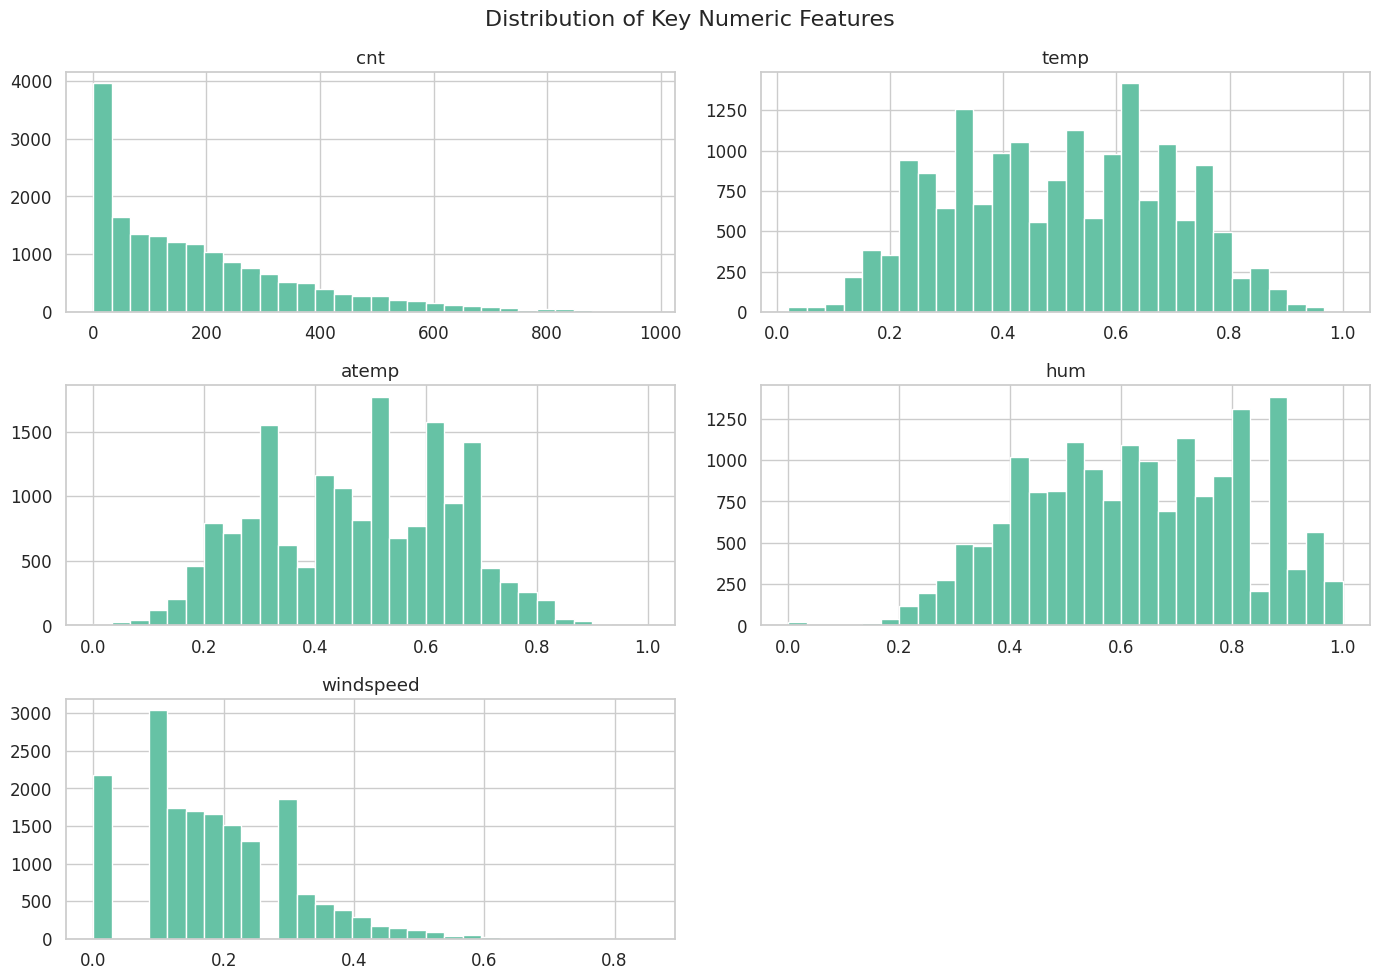

In [ ]:

# Plot distributions of key numeric features
# Code Explanation:
# 1. Plot Histograms: Assess distribution shape, skewness, modality.
# 2. Features: Includes target variable (cnt) and continuous predictors.

df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].hist(bins=30, figsize=(14,10))
plt.suptitle("Distribution of Key Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()



### Outcome:
- `cnt` is right-skewed with some high-usage hours.
- Temperature (`temp` and `atemp`) is fairly normally distributed.
- Humidity has slight left skew, and windspeed is positively skewed.


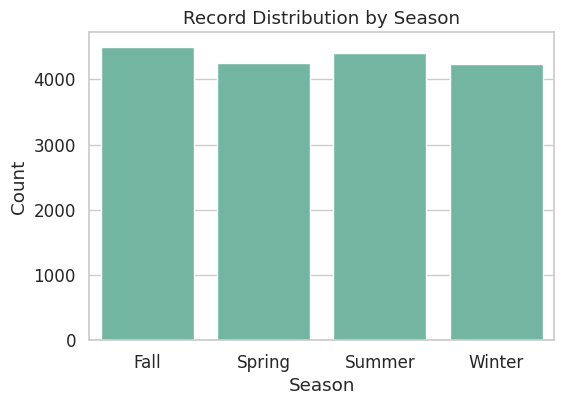

In [ ]:

# Count plot for seasons
# Code Explanation:
# 1. Visualize distribution of samples across seasons.

plt.figure(figsize=(6,4))
sns.countplot(x='season', data=df)
plt.title("Record Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()



### Outcome:
- Each season is nearly equally represented.
- Ensures seasonal trends can be analyzed without sampling bias.


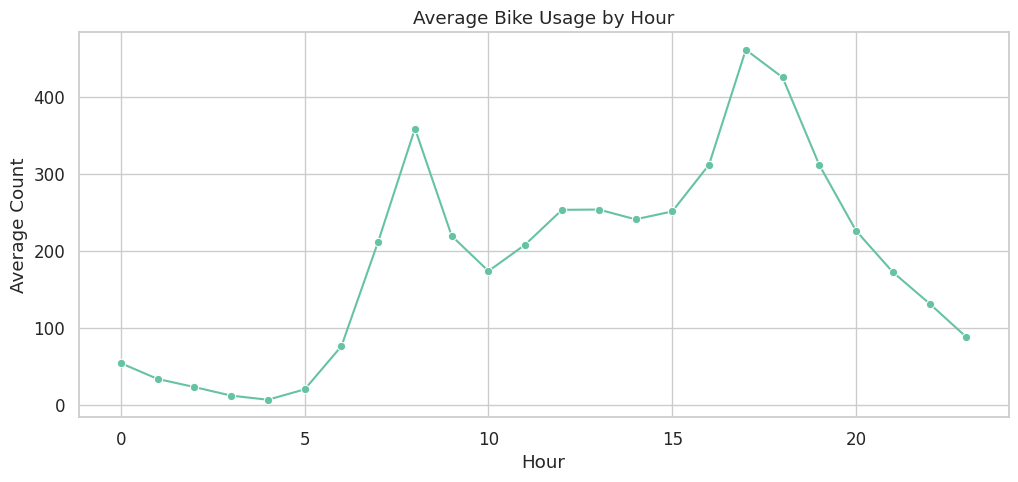

In [ ]:

# Analyze bike usage by hour
# Code Explanation:
# 1. Group by 'hr' and average the count column.
# 2. Use lineplot to visualize hourly trend.

plt.figure(figsize=(12,5))
sns.lineplot(x='hr', y='cnt', data=df, estimator='mean', errorbar=None, marker='o')
plt.title("Average Bike Usage by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Count")
plt.grid(True)
plt.show()



### Outcome:
- Peak usage occurs during commute hours: 8 AM and 5-6 PM.
- Dip during early morning and late night hours.


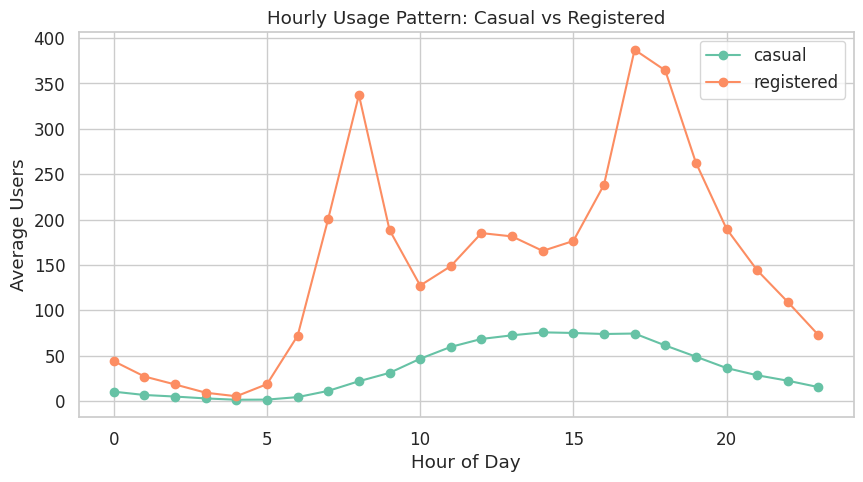

In [ ]:

# Compare casual vs registered usage
# Code Explanation:
# 1. Group by hour and average the two user types.
# 2. Overlayed plot for comparison.

hour_group = df.groupby('hr')[['casual', 'registered']].mean()
hour_group.plot(figsize=(10,5), marker='o')
plt.title('Hourly Usage Pattern: Casual vs Registered')
plt.xlabel('Hour of Day')
plt.ylabel('Average Users')
plt.grid(True)
plt.show()



### Outcome:
- Registered users show sharp peaks at 8 AM and 5-6 PM (commuting).
- Casual users peak in late morning and afternoon, especially on weekends.


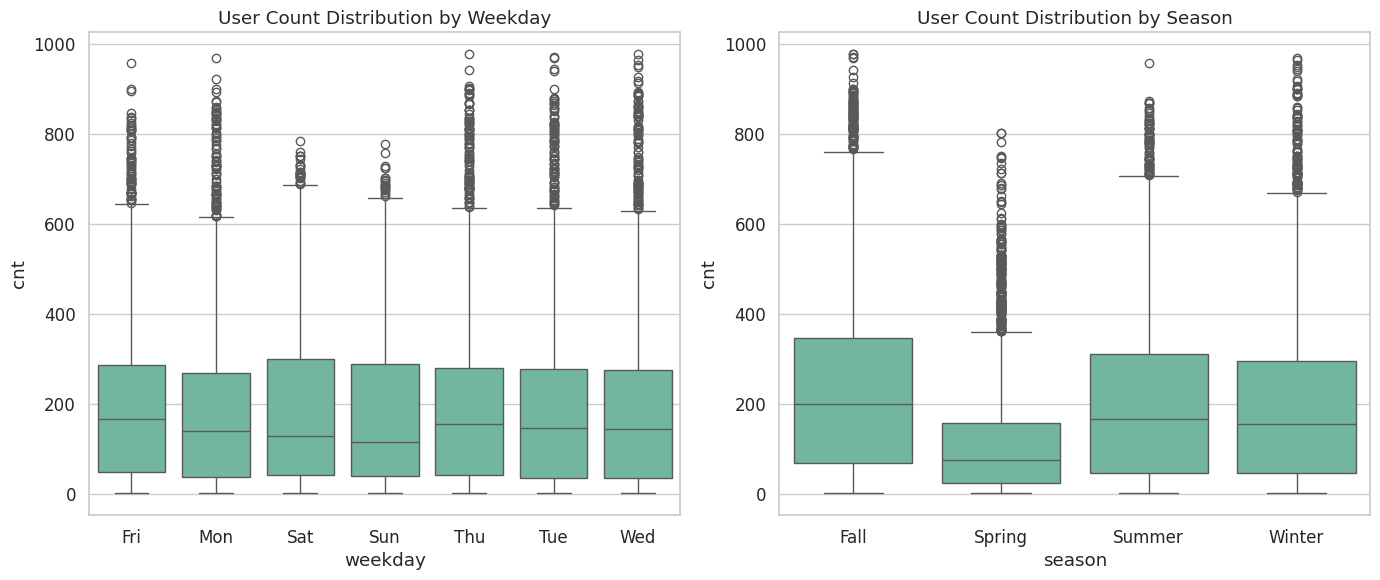

In [ ]:

# Boxplots for categorical vs numerical (cnt)
# Code Explanation:
# Visualize distribution of count across categories (weekday, season).

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title("User Count Distribution by Weekday")

plt.subplot(1,2,2)
sns.boxplot(x='season', y='cnt', data=df)
plt.title("User Count Distribution by Season")

plt.tight_layout()
plt.show()



### Outcome:
- Weekdays have higher median usage compared to weekends.
- Summer and Fall show higher overall usage than Winter and Spring.


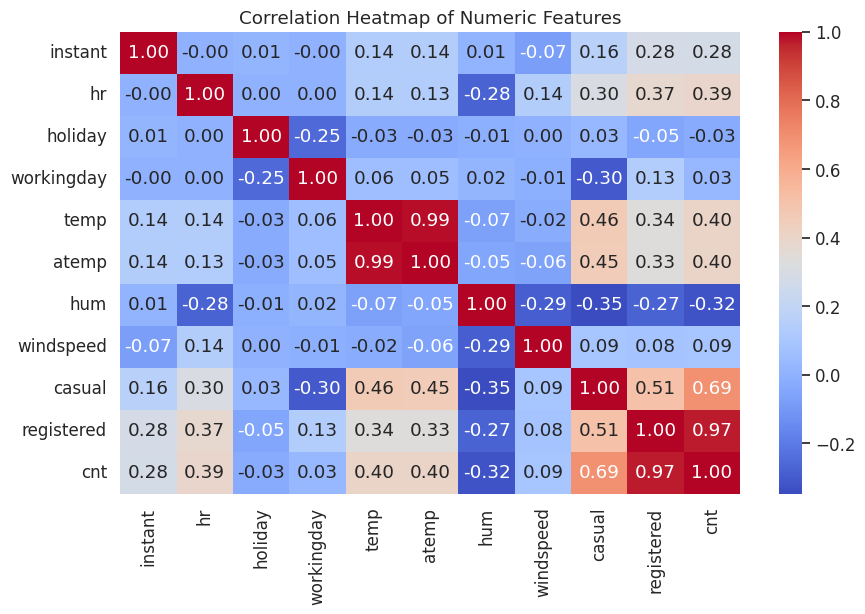

In [ ]:

# Correlation heatmap
# Code Explanation:
# Identify inter-variable relationships using correlation matrix.

numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



### Outcome:
- Strong positive correlation between `cnt` and `temp` / `atemp`.
- Negative correlation between `hum` and `cnt` suggests people avoid biking on humid days.
- `windspeed` shows weak negative correlation with `cnt`.



## 💾 Step 7: Export Cleaned Dataset

Final step is to export the cleaned dataset for use in dashboarding or modeling.


In [ ]:

# Export cleaned dataset to CSV
# Code Explanation:
# 1. Save the cleaned and transformed DataFrame to disk.

df.to_csv("hour_cleaned.csv", index=False)
